# import library

In [1]:
import numpy as np
import struct
from array import array
import random
import matplotlib.pyplot as plt
from keras import Input


# MNIST data loader class


In [2]:

class MnistDataLoader(object):
    def __init__(self, training_images_filepath, training_labels_filepath, testing_images_filepath, testing_labels_filepath):
        # Initializes the class with file paths for the training and testing images and labels.
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.testing_images_filepath = testing_images_filepath
        self.testing_labels_filepath = testing_labels_filepath
    
    def read_data(self, image_filepath, label_filepath):
        # Read labels
        with open(label_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            print(f"Magic number for labels: {magic}")  # Debugging line
            if magic != 2049:
                raise ValueError(f"Magic number mismatch for labels, expected 2049, got {magic}")
            labels_data = array("B", file.read())
        
        # Read images
        with open(image_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            print(f"Magic number for images: {magic}")  # Debugging line
            if magic != 2051:
                raise ValueError(f"Magic number mismatch for images, expected 2051, got {magic}")
            image_data = array("B", file.read())
        
        # Process images
        images = []
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)  # Reshape image to 28x28
            images.append(img)

        return images, labels_data
    
    def load_data(self):
        # Load training data
        x_train, y_train = self.read_data(self.training_images_filepath, self.training_labels_filepath)
        # Load testing data
        x_test, y_test = self.read_data(self.testing_images_filepath, self.testing_labels_filepath)
        return (x_train, y_train), (x_test, y_test)


# Set file paths based on added MNIST Datasets

In [3]:
training_images_filepath = 'H:/Handwritten_Digit_PredIction_Program/trainingimages.idx3-ubyte'
training_labels_filepath = 'H:/Handwritten_Digit_PredIction_Program/train-labels.idx1-ubyte'
testing_images_filepath = 'H:/Handwritten_Digit_PredIction_Program/testingimages.idx3-ubyte'
testing_labels_filepath = 'H:/Handwritten_Digit_PredIction_Program/t10k-labels.idx1-ubyte'

#  function to show a list of images with their titles




In [4]:
def show_images(images,title_texts):
    cols = 5   
    #Sets the number of columns for the image grid to 5.
    rows = int(len(images)/cols) + 1 
    #Calculates the number of rows needed based on the total number of images
    plt.figure(figsize = (30,20)) #This creates a new figure with a specified size of 30x20 inches for displaying the images.
    index =1
    for x in zip(images,title_texts):  #function in Python takes multiple iterables and combines them into a single iterable of tuples
        image = x[0]
        title_texts = x[1]
        plt.subplot(rows, cols, index)
        plt.subplot(rows,cols,index)#This function creates a grid of subplots within a figure.
        plt.imshow(image, cmap=plt.cm.gray) # This function displays an image in the current subplot.
        if title_texts != '':
            plt.title(title_texts,fontsize=15)
        index += 1

# Load MNIST dataset 

In [5]:
mnist_dataloader = MnistDataLoader(training_images_filepath, training_labels_filepath, testing_images_filepath, testing_labels_filepath)
 # creating an instance of a class
(x_train, y_train),(x_test, y_test) = mnist_dataloader.load_data() #It returns two tuples:
#(x_train, y_train): Contains the training images and their corresponding labels.
#(x_test, y_test): Contains the test images and their corresponding labels.

Magic number for labels: 2049
Magic number for images: 2051
Magic number for labels: 2049
Magic number for images: 2051


# Show some random training and testing images


Training images shape: (60000, 28, 28)

Training labels shape: (60000,)

Test images shape: (10000, 28, 28)

Test labels shape: (10000,)

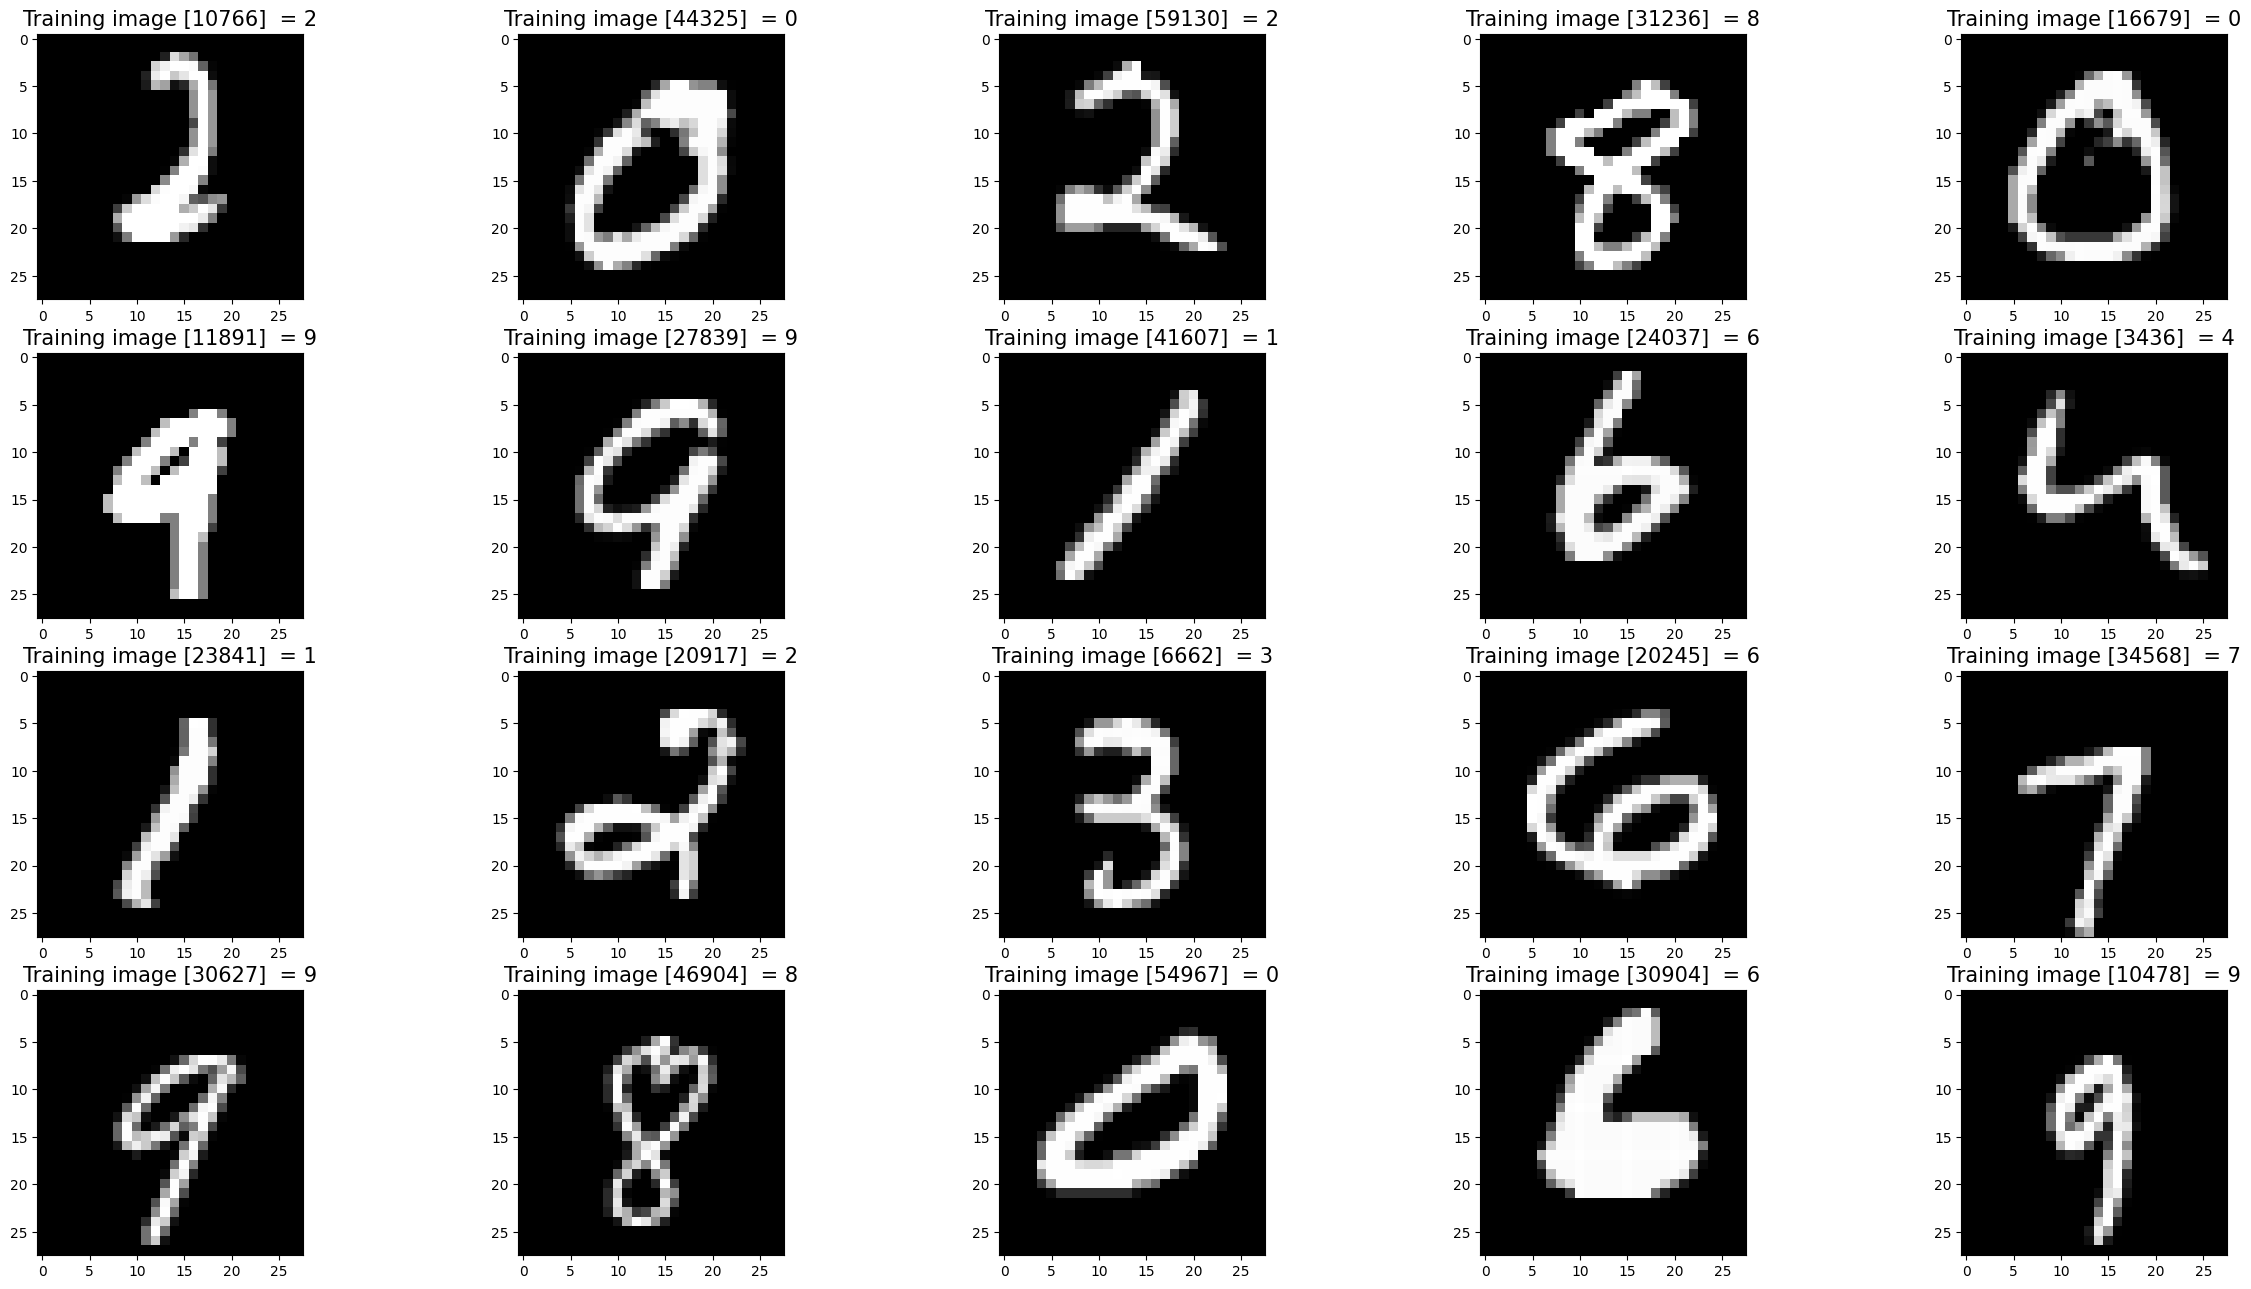

In [6]:
images_2_show = []
labels_2_show = []
for i in range(20):
    r = random.randint(0,59999) 
    images_2_show.append(x_train[r])
    labels_2_show.append('Training image [' + str(r) + ']  = ' + str(y_train[r] ))
    
show_images(images_2_show,labels_2_show) #function call

# Building a model for prediction of digit

# 1.Normalizing the data

In [7]:
x_train = np.array(x_train)/ 255.0 #normalize the  training images
x_test = np.array(x_test)/ 255.0 #normalize the testing images

# 2.flatten the images
Most machine learning models (especially fully connected neural networks) require the input to be a flat array. So, you’ll want to flatten your 28x28 images into a 784-dimensional vector.

In [8]:


x_train = x_train.reshape(-1, 28 * 28) 
x_test = x_test.reshape(-1, 28 * 28)
# Convert labels to a NumPy array
y_train = np.array(y_train)  # Convert training labels to a NumPy array
y_test = np.array(y_test)    # Convert testing labels to a NumPy array


# 3. Build the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense


#creating the model
model = Sequential() #This model will serve as the foundation for adding layers to it.
model.add(Input(shape=(28 * 28,)))  # Specify the input shape with an Input layer
model.add(Dense(128, activation='relu',input_shape=(28 * 28,)))  #hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))  #hidden layer with 64 neurons
model.add(Dense(10, activation='softmax')) #output layer with 10 classes(0-9). it converts the raw output of the model into probabilities for each class.

#compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Adam (Adaptive Moment Estimation)
 

C:\Users\honey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training the Model

In [10]:
model.fit(x_train, y_train, epochs=30, batch_size=80, validation_split=0.3)


Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8146 - loss: 0.6524 - val_accuracy: 0.9492 - val_loss: 0.1737
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9557 - loss: 0.1508 - val_accuracy: 0.9609 - val_loss: 0.1291
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9715 - loss: 0.0958 - val_accuracy: 0.9659 - val_loss: 0.1151
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9800 - loss: 0.0653 - val_accuracy: 0.9682 - val_loss: 0.1088
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9850 - loss: 0.0514 - val_accuracy: 0.9712 - val_loss: 0.0967
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9714 - val_loss: 0.1014
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0294 - val_accuracy: 0.9727 - val_loss: 0.1006
Epoch 8/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9935 - loss: 0.0228 - val_accuracy: 0.

# Evaluate the model

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9789 - loss: 0.1233
Test Accuracy: 98.15%
Test loss: 10.67%


# Visual prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


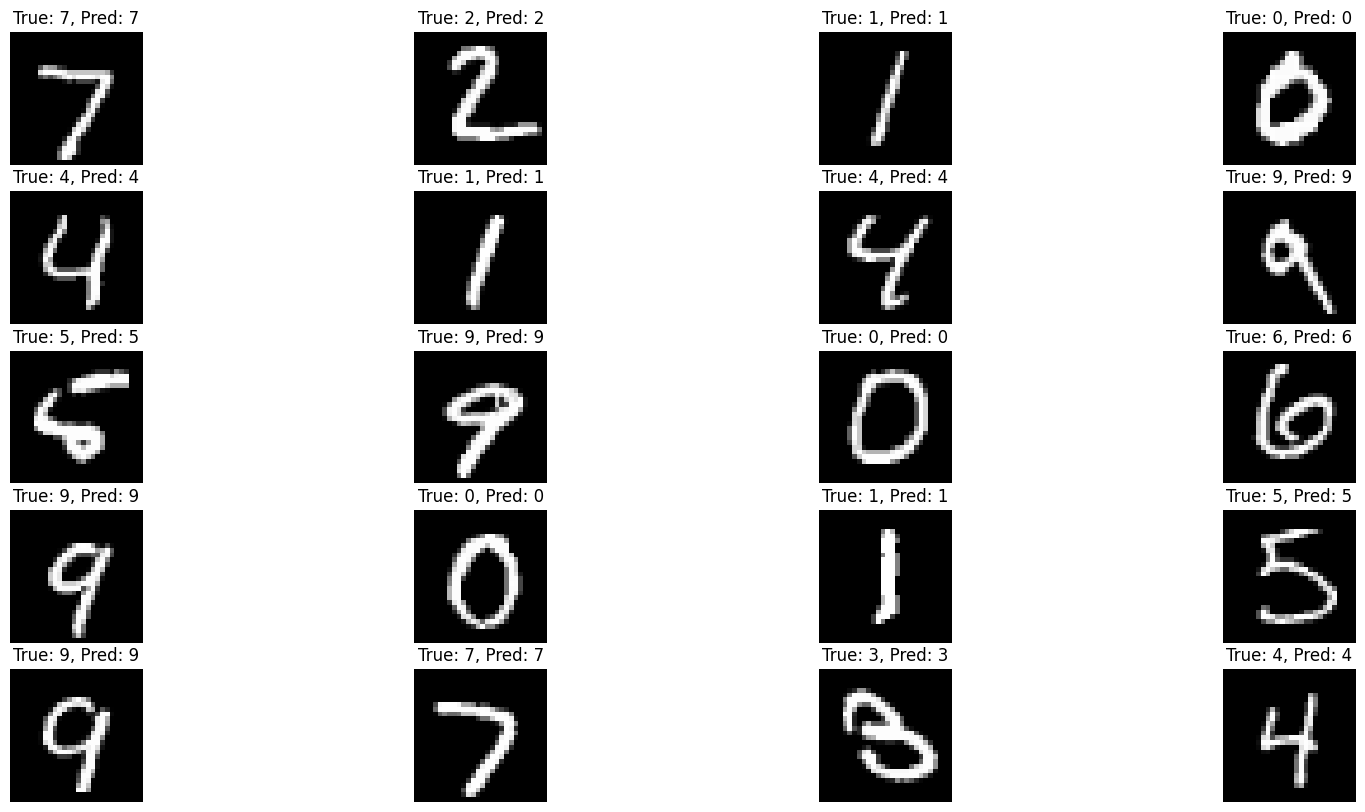

In [12]:
predictions = model.predict(x_test)

def show_predictions(images,labels_data,predictions,num_images = 20):
    plt.figure(figsize=(20,10))
    for i in range(num_images):
        plt.subplot(5,4,i+1)
        plt.imshow(images[i],cmap='gray')
        plt.title(f'True: {labels_data[i]}, Pred: {np.argmax(predictions[i])}')
        plt.axis('off') 
    plt.show()
    
    
show_predictions(x_test.reshape(-1,28, 28), y_test, predictions)


In [13]:

model.save('Handwritten.keras')